# 타이타닉_최종

## . 

### 필요한 라이브러리 설치

In [55]:
#데이터 호출
import pandas as pd
import numpy as np
import random as rnd

In [56]:
# 시각화
import seaborn as sbn
import matplotlib.pyplot as plt
import missingno as msno

In [57]:
# 결측치 제거
from sklearn.impute import SimpleImputer

In [58]:
# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [59]:
import warnings
warnings.filterwarnings(action='ignore')

### 타이타닉 데이터 불러오기

In [60]:
# train 데이터 불러오기
train = pd.read_csv('C:/Users/Edward/Desktop/PythonWorkspace/Titanic/train.csv')

# 확인
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [61]:
train.shape

(891, 12)

In [62]:
# test 데이터 불러오기
test = pd.read_csv('C:/Users/Edward/Desktop/PythonWorkspace/Titanic/test.csv')

# 확인
test.head(2)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S

In [63]:
test.shape

(418, 11)

In [64]:
# 모델 적용 일관성을 위해, train과 test를 합친 combine 생성
combine = [train,test]

### 변수 확인

In [65]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### 변수 설명

|변수|설명|
|------|---|
|survival|Survival (0 = 사망; 1 = 생존)|
|pclass|Passenger Class (1 = 1등석; 2 = 2등석; 3 = 3등석)|
|name|이름|
|sex|성별|
|age|나이|
|sibsp|동반한 형제자매(Sibling)와 배우자(Spouse)의 수|
|parch|동반한 부모(Parents)와 자식(Children)의 수|
|ticket|티캣 번호|
|fare|품삯|
|cabin|객실 번호|
|embarked|탑승한 항구 (C = Cherbourg; Q = Queenstown; S = Southampton)|

### 데이터 확인

In [66]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [67]:
train.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

#### 데이터 정보

In [68]:
# 훈련 셋 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
# 검증 셋 정보
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [70]:
# 훈련 자료 int, float 변수 통계치
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

총 샘플 수 : 891
샘플 내 생존율 : 38.38% (mean의 survived=0.383838)

In [71]:
# 훈련 자료 object 변수 통계치
train.describe(include=['O'])

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

Embarked 최빈값은 "S"

## 데이터 분석

### Pclass별 생존율

In [72]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#groupby에 as_index를 False로 해야 Pclass를 index로 사용하지 않음
# ascending : 오름차순

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

객실 등급이 높을수록 생존율이 높음

### Sex별 생존율

In [73]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

여성의 생존율이 매우 높음

### SibSp별 생존율

In [74]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

### Parch별 생존율

In [75]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

### Age별 생존율

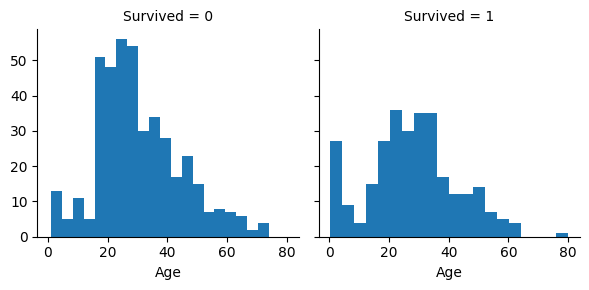

In [76]:
# 열(col)을 생존 여부로 나눔
g = sbn.FacetGrid(train, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist, 'Age', bins=20)

0-4세와 16-38세의 생존율이 높음

### Pclass와 Survived간의 Age 분포

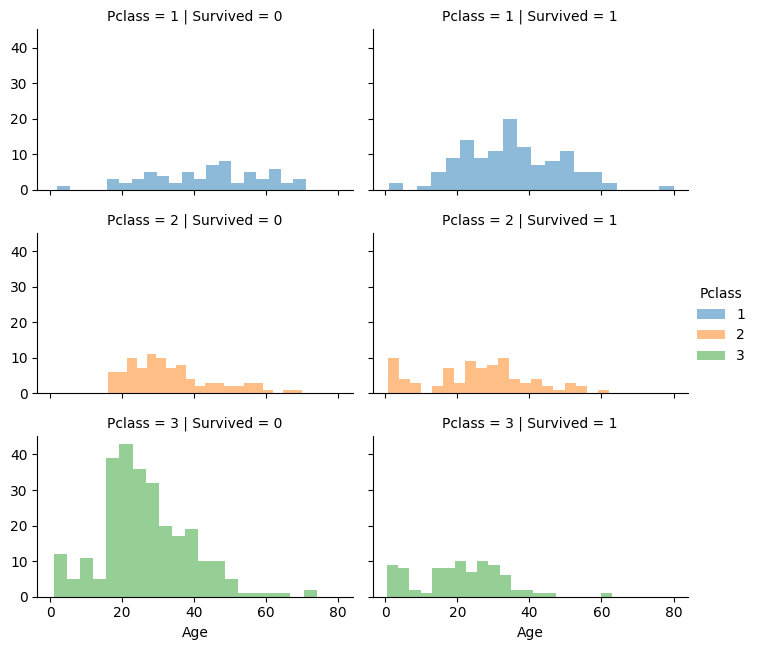

In [77]:
# 열을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 나눔, width = height * aspect
grid = sbn.FacetGrid(train, col='Survived', row='Pclass', hue="Pclass", height=2.2, aspect=1.6)

grid.map(plt.hist, 'Age', alpha=.5, bins=20) # 투명도(alpha): 0.5

# 범례 추가
grid.add_legend()

1등석의 경우 생존율이 좀 높은 경향을 보임  
2등석의 경우 영아 생존율이 높음  
3등석의 경우 승객 비중은 가장 많지만, 생존율은 가장 낮음

### Pclass별 Sex 분포

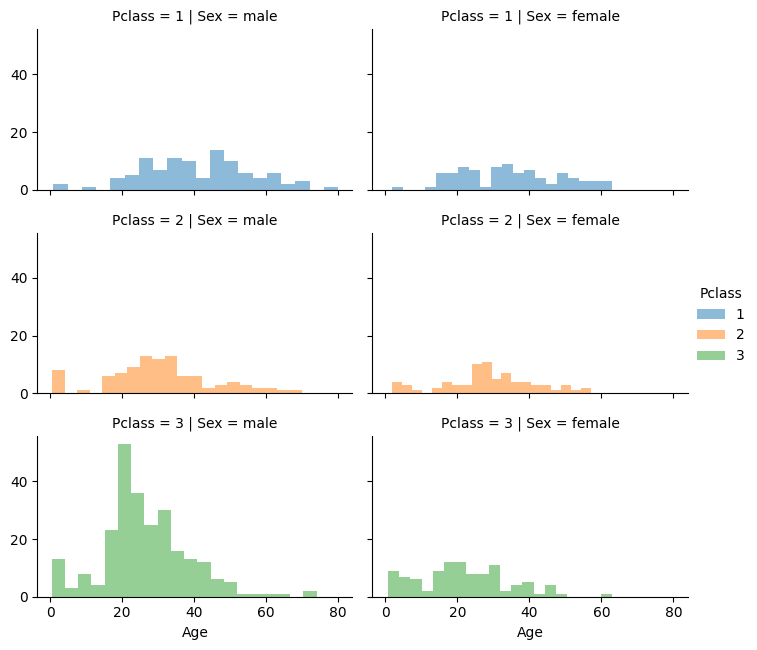

In [78]:
grid = sbn.FacetGrid(train, row='Pclass', col='Sex', hue="Pclass", height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

### Embarked와 Pclass에 따른 Survived 분포

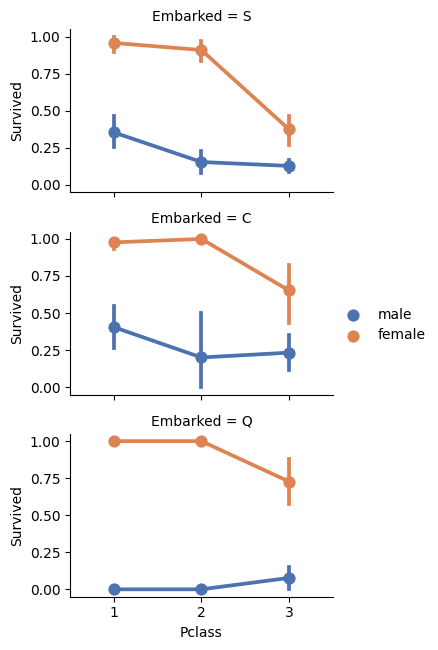

In [79]:
grid = sbn.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sbn.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])

grid.add_legend()

승선지가 C와 Q의 경우, 남성이 3등석 승객일 때, 2등석보다 생존율이 높음  
승선지가 C의 경우, 여성이 2등석 승객일 때, 1등석보다 생존율이 높음

### Embarked, Survived, Sex에 따른 Fare

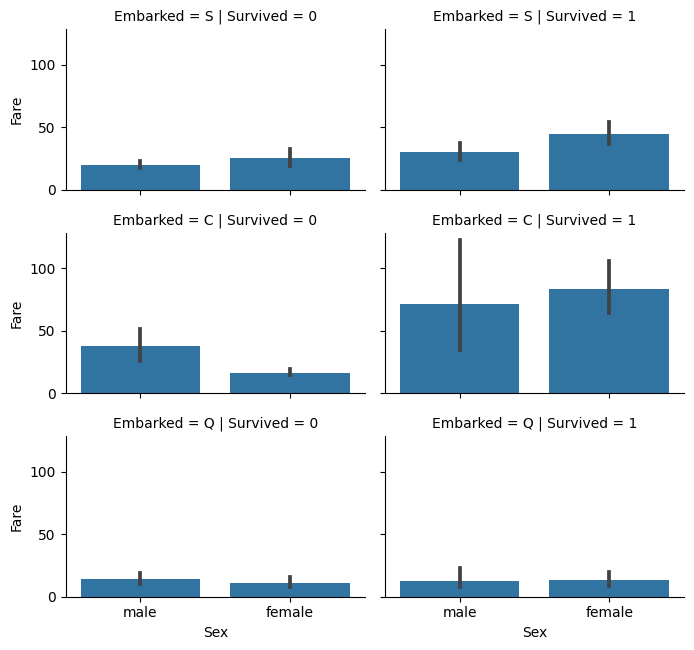

In [80]:
grid = sbn.FacetGrid(train, row='Embarked', col='Survived', height=2.2, aspect=1.6)

# 바그래프로 시각화, x: 성별, y: 요금, 
grid.map(sbn.barplot, 'Sex', 'Fare', order=["male","female"])

### 사용하지 않는 변수 제거 1

In [81]:
print("Before", train.shape, test.shape)

train = train.drop(['Ticket', 'PassengerId'], axis=1)
test = test.drop(['Ticket'], axis=1)
combine = [train, test]

print("After", train.shape, test.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 10)


### Name에서 Title 추출

In [82]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [83]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Noble')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4   Noble  0.347826

In [84]:
train.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Cabin Embarked Title  
0    male  22.0      1      0   7.2500   NaN        S    Mr  
1  female  38.0      1      0  71.2833   C85        C   Mrs  
2  female  26.0      0      0   7.9250   NaN        S  Miss  
3  female  35.0      1      0  53.1000  C123        S   Mrs  
4    male  35.0      0      0   8.0500   NaN        S    Mr

### 변수를 숫자형 변수로 변환

#### Sex

In [85]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare Cabin Embarked Title  
0  22.0      1      0   7.2500   NaN        S    Mr  
1  38.0      1      0  71.2833   C85        C   Mrs  
2  26.0      0      0   7.9250   NaN        S  Miss  
3  35.0      1      0  53.1000  C123        S   Mrs  
4  35.0      0      0   8.0500   NaN        S    Mr

#### Title

In [86]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare Cabin Embarked  Title  
0  22.0      1      0   7.2500   NaN        S    1.0  
1  38.0      1      0  71.2833   C85        C    3.0  
2  26.0      0      0   7.9250   NaN        S    2.0  
3  35.0      1      0  53.1000  C123        S    3.0  
4  35.0      0      0   8.0500   NaN        S    1.0

### 사용하지 않는 변수 제거 2

In [87]:
train = train.drop(['Name'], axis=1)
test= test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 10), (418, 10))

### 결측치 처리

#### 결측치 확인

In [88]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

#### 결측치 시각화

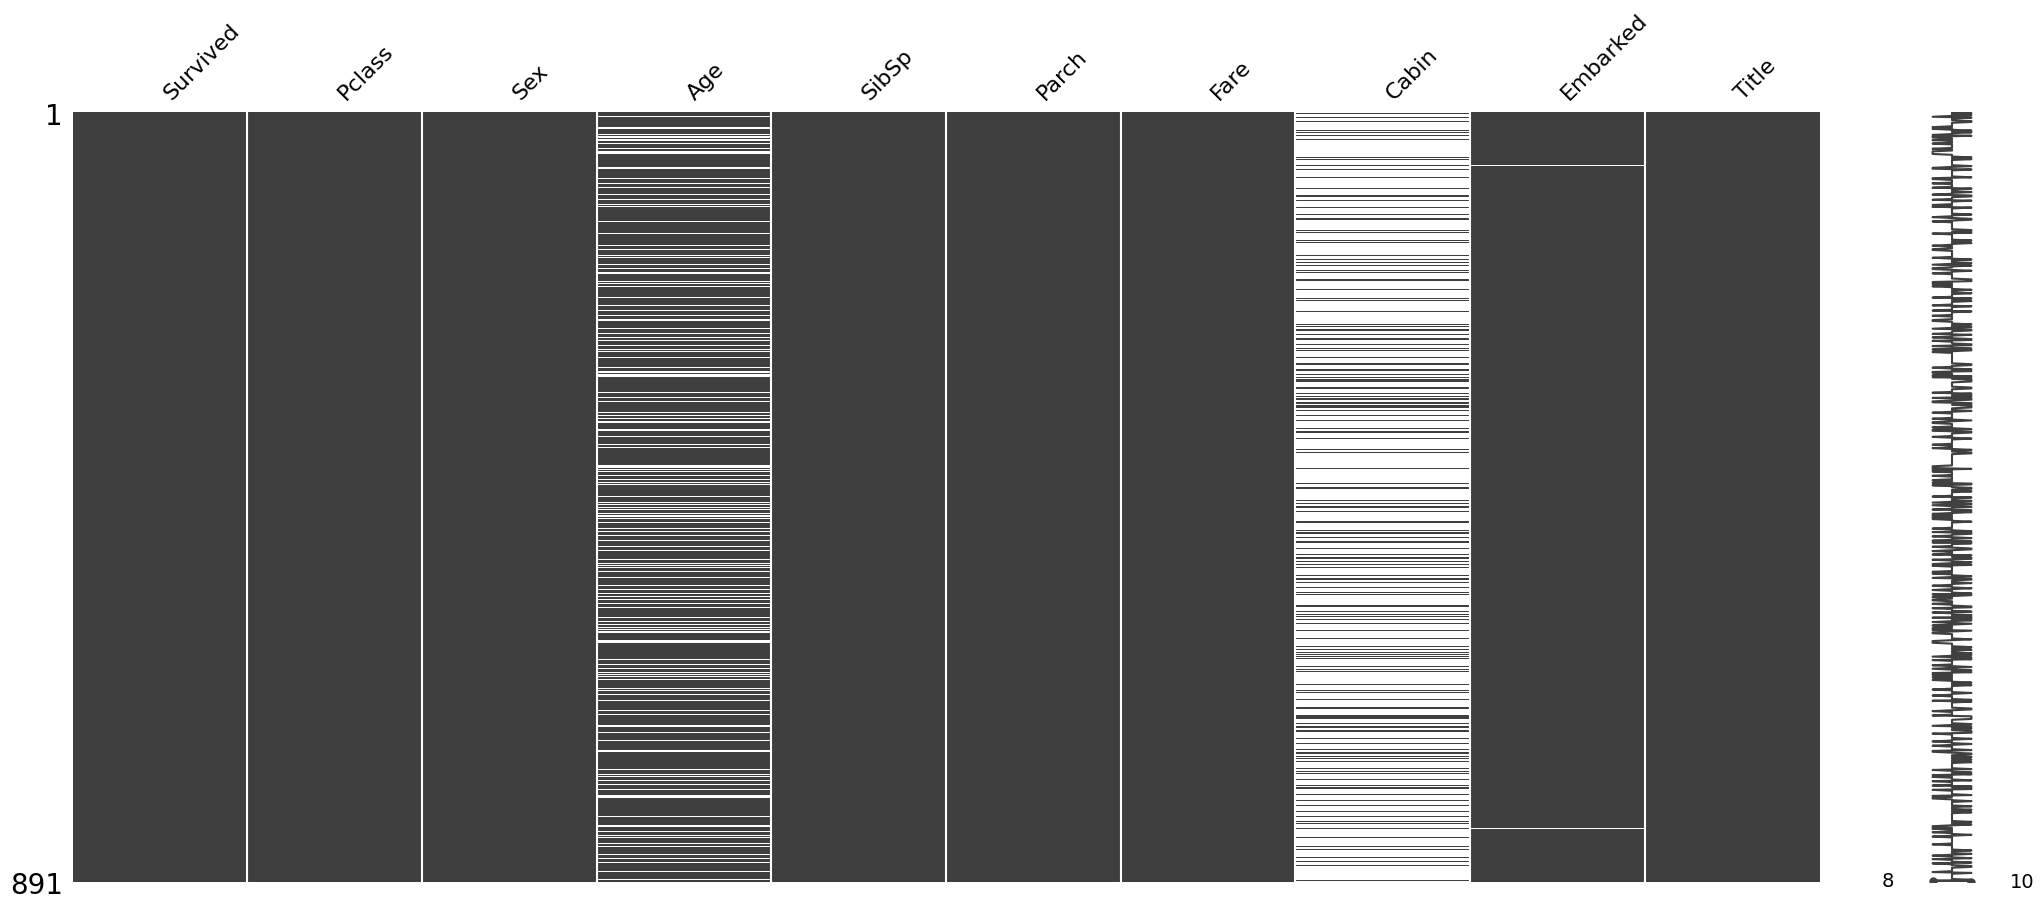

In [89]:
msno.matrix(train)
plt.show()

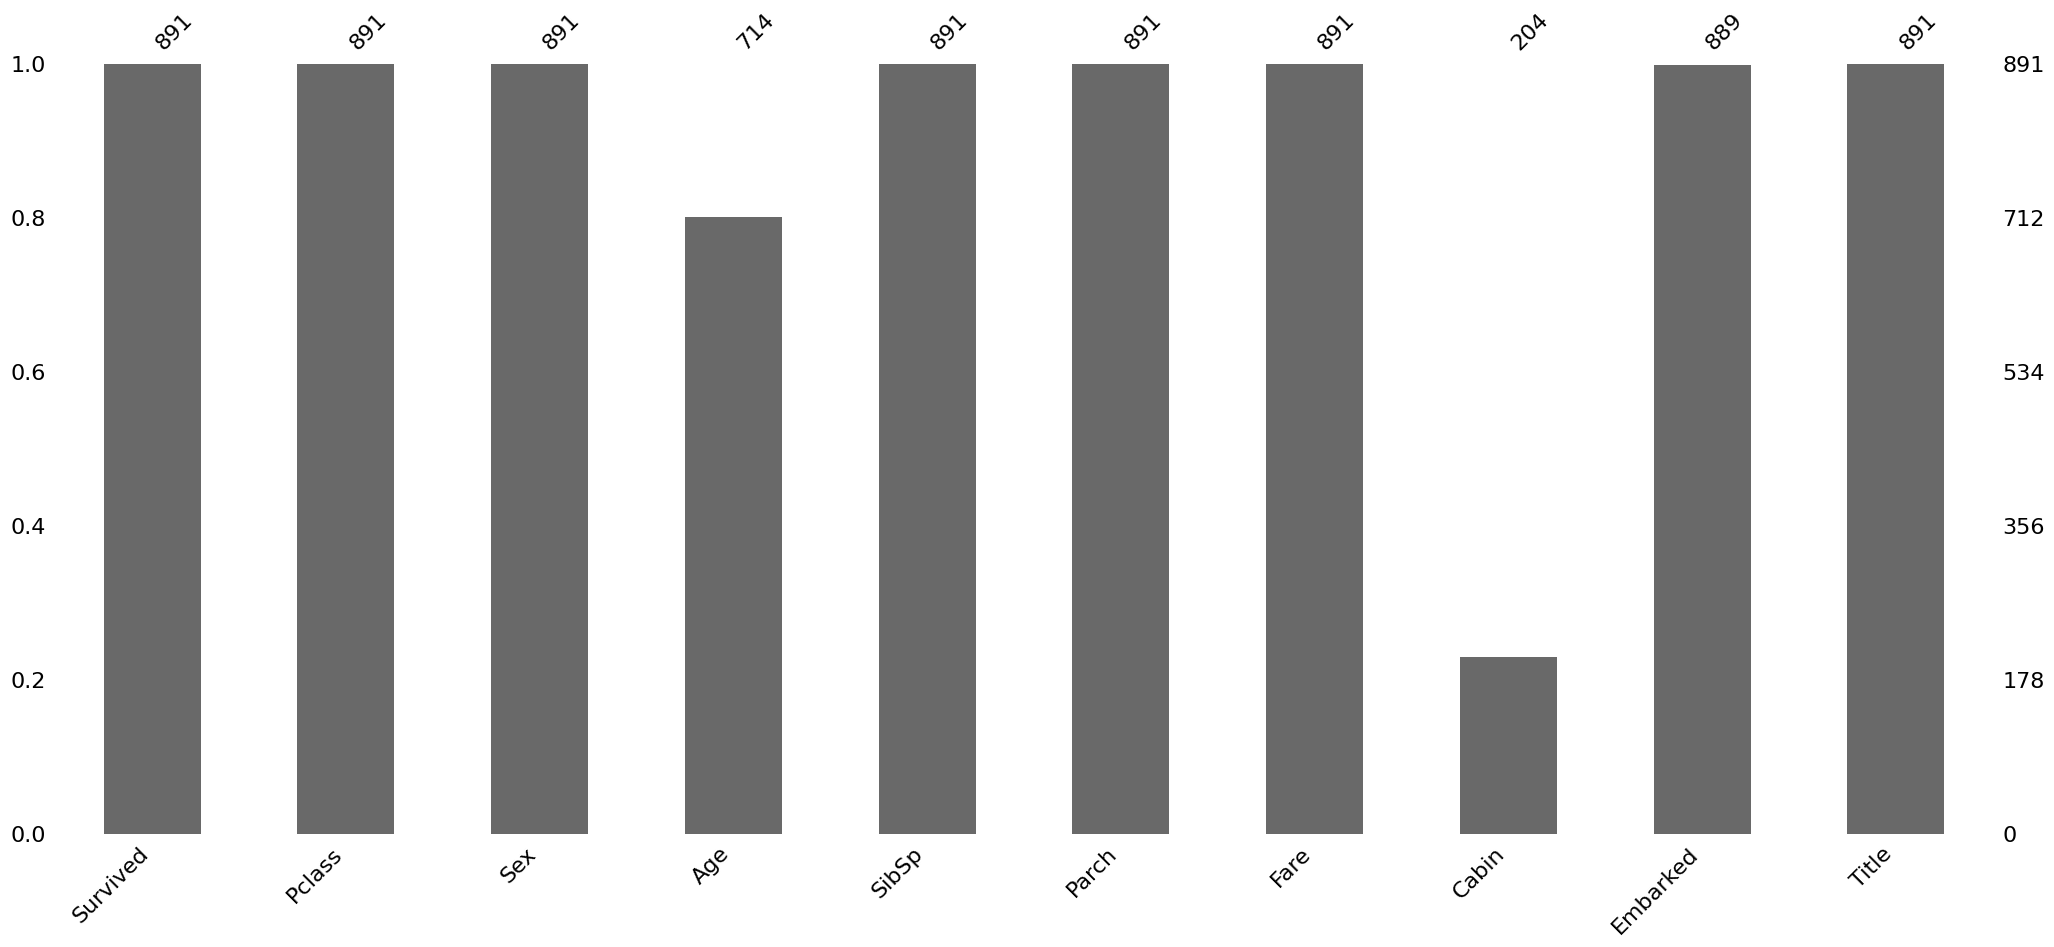

In [90]:
msno.bar(train)
plt.show()

#### Embarked 결측치 제거

In [91]:
# 대상을 리스트로 선언
imputer1_list = ['Embarked']

# 선언하고 fit_transform
imputer1 = SimpleImputer(strategy = 'most_frequent') # 최빈값을 이용한 결측치를 채우는 함수 사용
train[imputer1_list] = imputer1.fit_transform(train[imputer1_list])
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
Title         0
dtype: int64

### Cabin 결측치 제거

In [92]:
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].fillna('N')
    
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
Title         0
dtype: int64

In [93]:
train.Cabin.unique()

array(['N', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [94]:
for dataset in combine:
    dataset['Cabin_class'] = dataset['Cabin']
    dataset['Cabin_class'] = dataset.Cabin.str.extract('([A-Za-z]+)', expand=False)

train.Cabin_class.unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [95]:
train[["Cabin_class", "Survived"]].groupby(['Cabin_class'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Cabin_class  Survived
3           D  0.757576
4           E  0.750000
1           B  0.744681
5           F  0.615385
2           C  0.593220
6           G  0.500000
0           A  0.466667
7           N  0.299854
8           T  0.000000

In [96]:
Cabin_mapping = {"T": 0, "N": 1, "A": 2, "G": 3, "C": 4, "F": 5, "B": 6, "E": 7, "D": 8}
for dataset in combine:
    dataset['Cabin_class'] = dataset['Cabin_class'].map(Cabin_mapping)
    dataset['Cabin_class'] = dataset['Cabin_class'].fillna(0)

train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin Embarked  Title  \
0         0       3    0  22.0      1      0   7.2500     N        S    1.0   
1         1       1    1  38.0      1      0  71.2833   C85        C    3.0   
2         1       3    1  26.0      0      0   7.9250     N        S    2.0   
3         1       1    1  35.0      1      0  53.1000  C123        S    3.0   
4         0       3    0  35.0      0      0   8.0500     N        S    1.0   

   Cabin_class  
0            1  
1            4  
2            1  
3            4  
4            1

### 사용하지 않는 변수 제거 3

In [97]:
train = train.drop(['Cabin'], axis=1)
test= test.drop(['Cabin'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 10), (418, 10))

#### Age 결측치 제거

In [98]:
guess_ages = np.zeros((2,3)) # 0으로 가득한 2*3 Array 생성
for dataset in combine:
    for i in range(0, 2): # i를 0부터 2까지 반복
        for j in range(0, 3): # j를 0부터 3까지 반복
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna() # 여기서 부터 작동원리 이해 안됨
            # 위에서 guess_ages사이즈를 [2,3]으로 잡아뒀으므로 j의 범위도 이를 따름
            
            age_guess = guess_df.median()

            # age의 random값의 소수점을 .5에 가깝도록 변형
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
Cabin_class    0
dtype: int64

### Age를 범주형으로 변환

In [99]:
train['AgeBand'] = pd.cut(train['Age'], 5)
# 임의로 5개 그룹을 지정
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.337374
2   (32.0, 48.0]  0.412037
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909

생성된 AgeBand을 통해 Age를 범주형으로 변환 후, AgeBand 제거

In [100]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train = train.drop(['AgeBand'], axis=1)
combine = [train, test]
train.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title  \
0         0       3    0    1      1      0   7.2500        S    1.0   
1         1       1    1    2      1      0  71.2833        C    3.0   
2         1       3    1    1      0      0   7.9250        S    2.0   
3         1       1    1    2      1      0  53.1000        S    3.0   
4         0       3    0    2      0      0   8.0500        S    1.0   

   Cabin_class  
0            1  
1            4  
2            1  
3            4  
4            1

### SibSp와 Parch를 활용하여 FamilySize 변수 생성

In [101]:
for dataset in combine:
    dataset['Familysize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['Familysize', 'Survived']].groupby(['Familysize'], as_index=False).mean().sort_values(by='Familysize', ascending=True)

Familysize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000

Familysize 1은 가족을 동반하지 않음을 의미

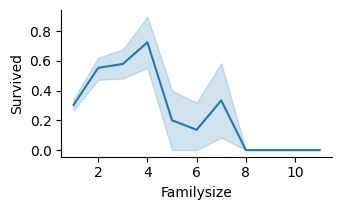

In [102]:
grid = sbn.FacetGrid(train, height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sbn.lineplot, 'Familysize', 'Survived', palette='deep', markers=True)

### Age와 Pclass 값을 곱한 Age*Pclass 변수 생성

In [103]:
for dataset in combine:
    dataset['Age*Pclass'] = dataset.Age * dataset.Pclass

train.loc[:, ['Age*Pclass', 'Age', 'Pclass']].head(10)

Age*Pclass  Age  Pclass
0           3    1       3
1           2    2       1
2           3    1       3
3           2    2       1
4           6    2       3
5           3    1       3
6           3    3       1
7           0    0       3
8           3    1       3
9           0    0       2

### Embarked 범주형 함수로 변환

In [104]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

In [105]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  Title  \
0         0       3    0    1      1      0   7.2500         0    1.0   
1         1       1    1    2      1      0  71.2833         1    3.0   
2         1       3    1    1      0      0   7.9250         0    2.0   
3         1       1    1    2      1      0  53.1000         0    3.0   
4         0       3    0    2      0      0   8.0500         0    1.0   

   Cabin_class  Familysize  Age*Pclass  
0            1           2           3  
1            4           2           2  
2            1           1           3  
3            4           2           2  
4            1           1           6

### Fare를 중앙값으로 대체

In [106]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()

PassengerId  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  Title  \
0          892       3    0    2      0      0   7.8292         2    1.0   
1          893       3    1    2      1      0   7.0000         0    3.0   
2          894       2    0    3      0      0   9.6875         2    1.0   
3          895       3    0    1      0      0   8.6625         0    1.0   
4          896       3    1    1      1      1  12.2875         0    3.0   

   Cabin_class  Familysize  Age*Pclass  
0            1           1           6  
1            1           2           6  
2            1           1           6  
3            1           1           3  
4            1           3           3

In [107]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

In [108]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    
train.head(10)

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title  \
0         0       3    0    1      1      0     0         0    1.0   
1         1       1    1    2      1      0     3         1    3.0   
2         1       3    1    1      0      0     1         0    2.0   
3         1       1    1    2      1      0     3         0    3.0   
4         0       3    0    2      0      0     1         0    1.0   
5         0       3    0    1      0      0     1         2    1.0   
6         0       1    0    3      0      0     3         0    1.0   
7         0       3    0    0      3      1     2         0    4.0   
8         1       3    1    1      0      2     1         0    3.0   
9         1       2    1    0      1      0     2         1    3.0   

   Cabin_class  Familysize  Age*Pclass  
0            1           2           3  
1            4           2           2  
2            1           1           3  
3            4           2           2  
4            1           1           6  
5            1           1           3  
6            7           1           3  
7            1           5           0  
8            1           3           3  
9            1           2           0

## 데이터 준비

In [109]:
# 목적 변수 제거
X_train = train.drop("Survived", axis=1)
#목적 변수 역할
Y_train = train["Survived"]
#예측 대상 데이터 셋
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int32  
 3   Age          891 non-null    int32  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    int32  
 7   Embarked     891 non-null    int32  
 8   Title        891 non-null    float64
 9   Cabin_class  891 non-null    int64  
 10  Familysize   891 non-null    int64  
 11  Age*Pclass   891 non-null    int64  
dtypes: float64(1), int32(4), int64(7)
memory usage: 69.7 KB


### Logistic Regression

In [111]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

84.18

In [112]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

Feature  Correlation
1           Sex     1.769539
7         Title     0.956234
6      Embarked     0.254156
5          Fare     0.203364
8   Cabin_class     0.168720
4         Parch    -0.049250
10   Age*Pclass    -0.145741
2           Age    -0.256525
3         SibSp    -0.265808
9    Familysize    -0.315110
0        Pclass    -0.654571

생존 여부 예측에 영향력이 큰 변수는 성별(Sex)

### SCM (Support Vector Machines)

In [113]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.95

### KNN (K Nearest Neighberhood)

In [114]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.76

### Gaussian Naive Bayes

In [115]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.81

### Perceptron

In [116]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

67.68

### Linear SVC

In [117]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(acc_linear_svc)

83.95


### Stochastic Gradient Descent

In [118]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

82.27

### Decision Tree

In [119]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

91.13

### Random Forest

In [120]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

91.13

### 모델 비교

In [121]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

Model  Score
3               Random Forest  91.13
8               Decision Tree  91.13
1                         KNN  86.76
2         Logistic Regression  84.18
0     Support Vector Machines  83.95
7                  Linear SVC  83.95
6  Stochastic Gradient Decent  82.27
4                 Naive Bayes  80.81
5                  Perceptron  67.68